## An Ensemble Deep Learning Model for Vehicular Engine Health Prediction

In [1]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
#read the dataset
df = pd.read_csv('newengine_data.csv')

In [3]:
#read the top 5 rows of data
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,2274.848610,23.505867,29.243881,4.246782,86.417309,76.884161,0
1,2090.707432,23.411805,19.425377,4.583513,87.661897,89.795122,0
2,1530.197432,26.016272,22.463742,5.418869,70.976527,66.523439,0
3,847.098861,27.631603,27.250730,3.378207,72.328231,81.479725,0
4,717.010812,28.395960,20.506552,4.079368,91.100228,81.696079,0


In [4]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        3000 non-null   float64
 1   Lub oil pressure  3000 non-null   float64
 2   Fuel pressure     3000 non-null   float64
 3   Coolant pressure  3000 non-null   float64
 4   lub oil temp      3000 non-null   float64
 5   Coolant temp      3000 non-null   float64
 6   Engine Condition  3000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 164.2 KB


In [5]:
#check the value counts
df['Engine Condition'].value_counts()

Engine Condition
0    1502
1    1498
Name: count, dtype: int64

Data is balanced here, we can go with model training

## Exploratory Data Analysis

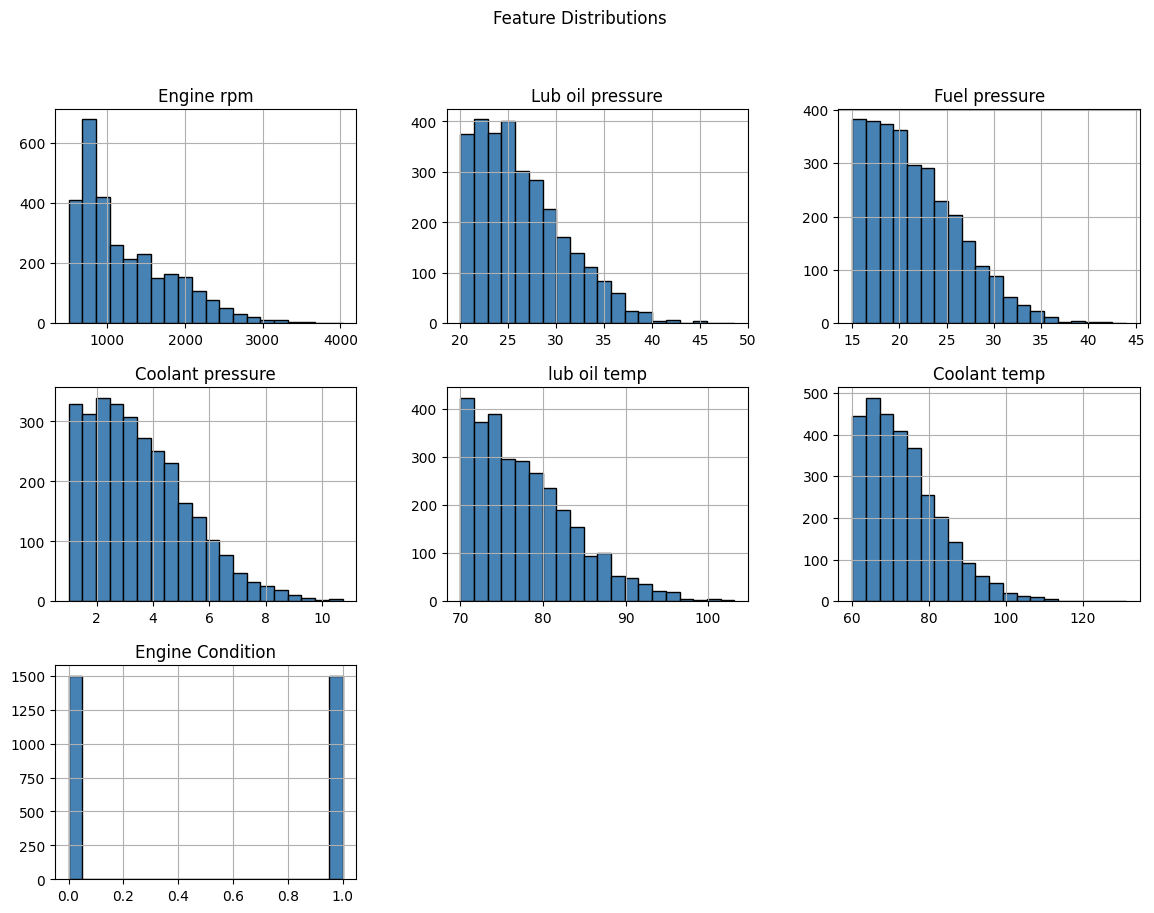

In [6]:
# Histograms
df.hist(bins=20, figsize=(14, 10), color='steelblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

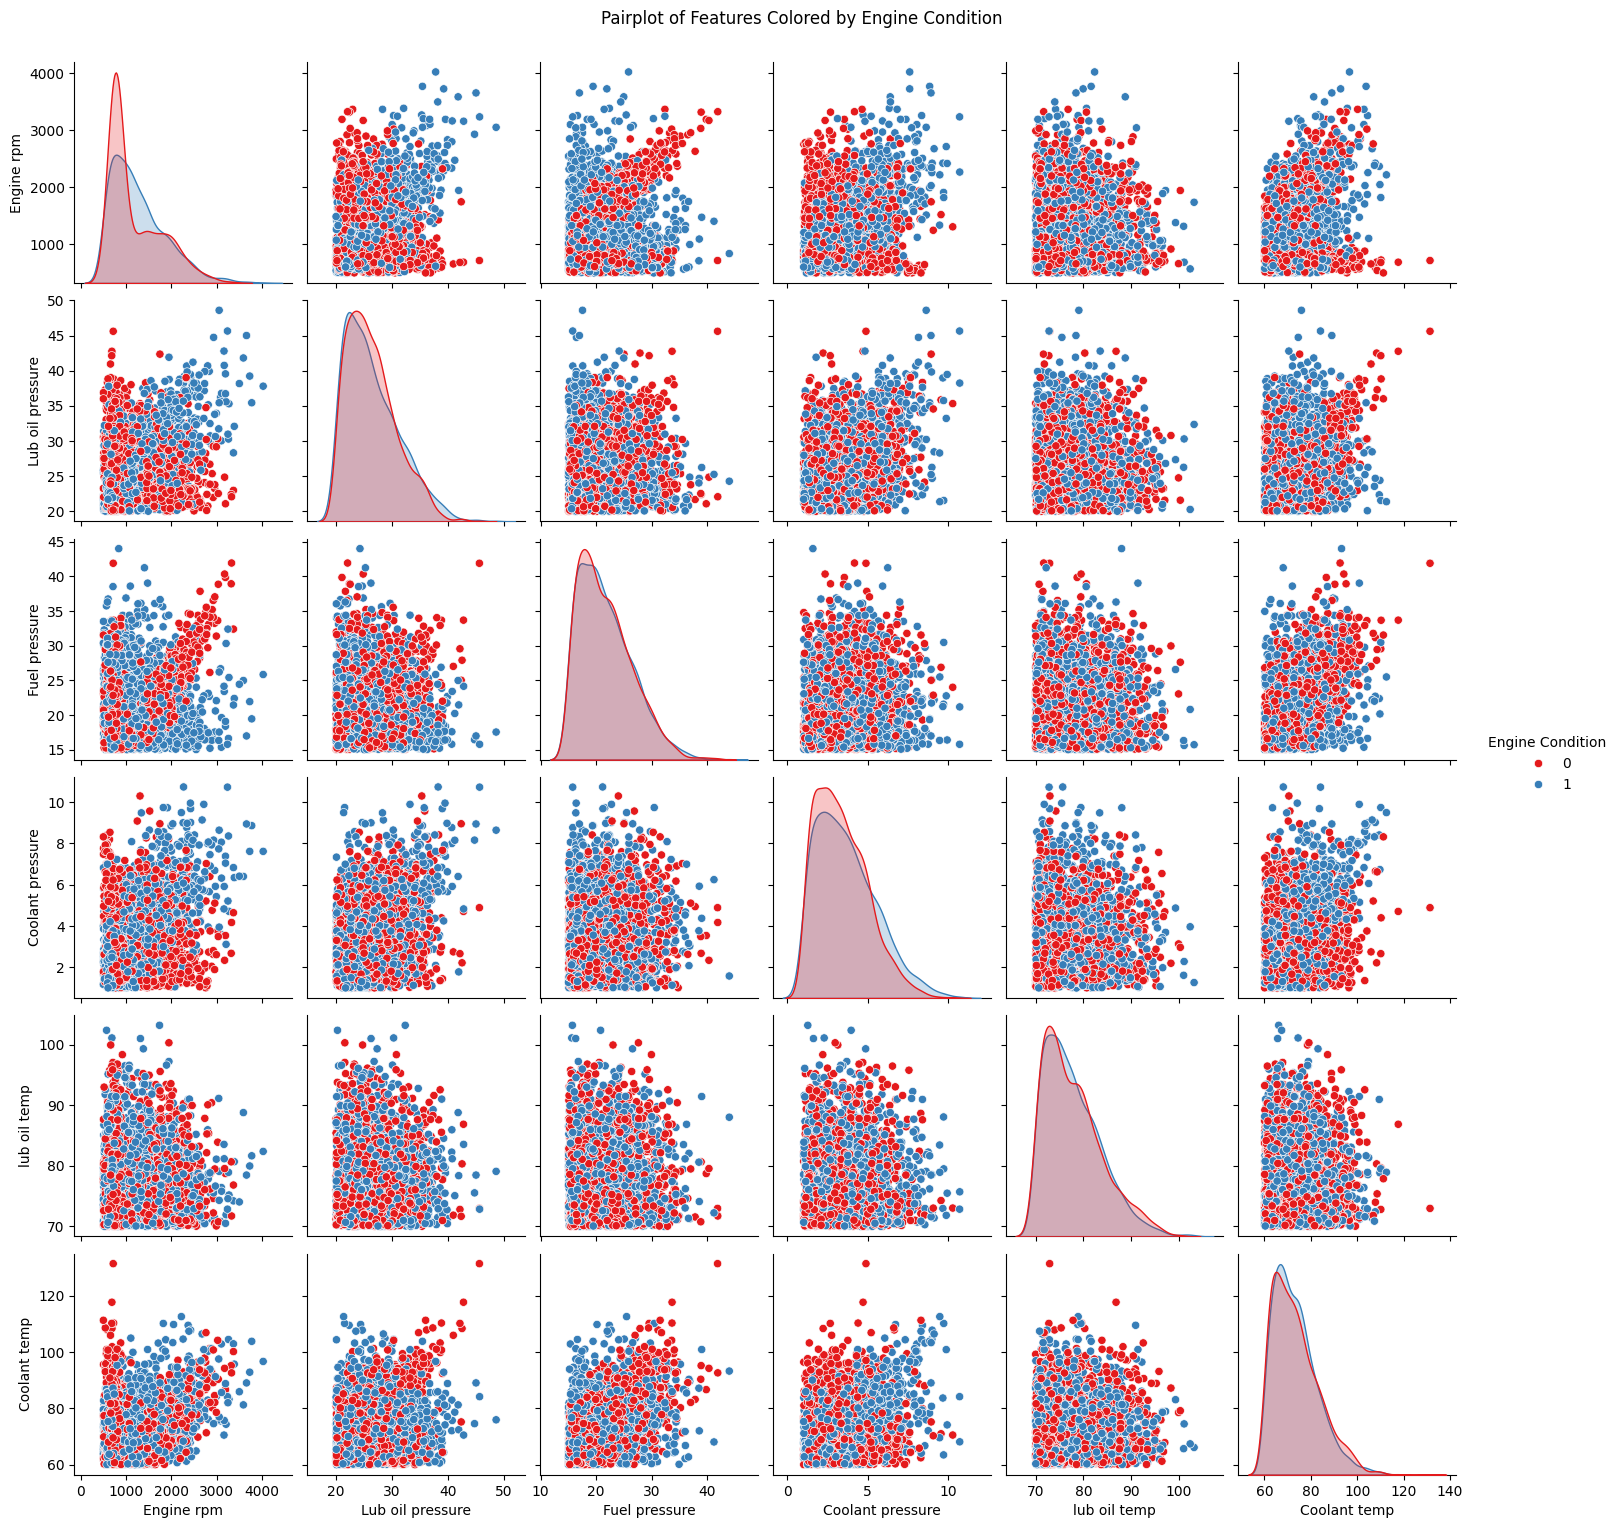

In [7]:
# Pairplot
sns.pairplot(df, hue='Engine Condition', palette='Set1')
plt.suptitle('Pairplot of Features Colored by Engine Condition', y=1.02)
plt.show()

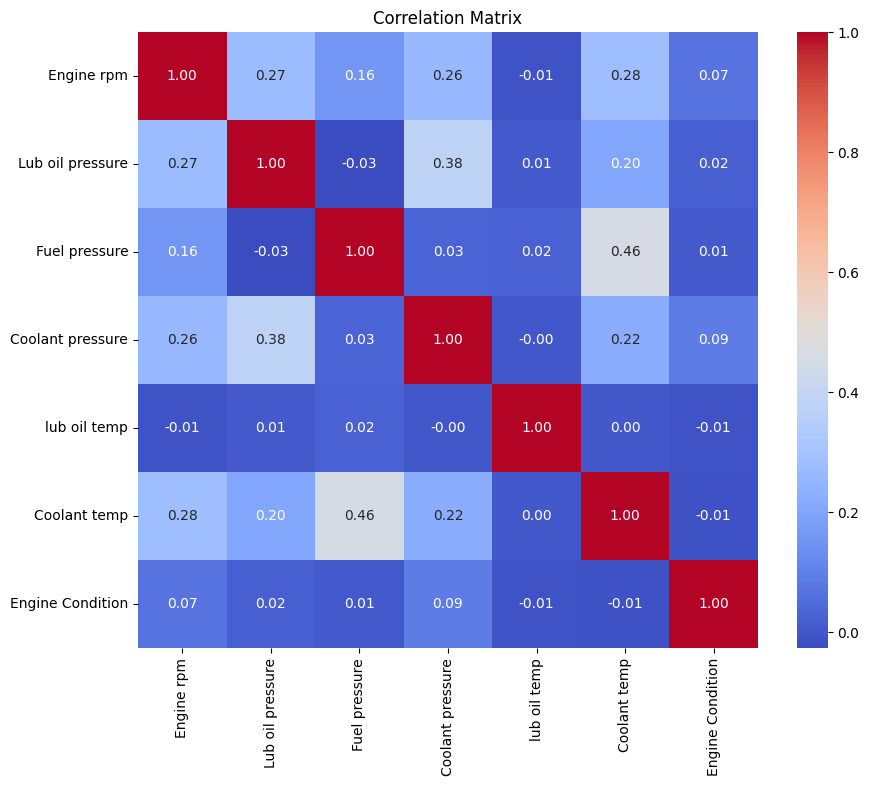

In [9]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Split the features and target variable
X = df.drop('Engine Condition', axis=1)
y = df['Engine Condition']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Train the model

Decision Tree Classifier:
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.77       297
           1       0.78      0.73      0.75       303

    accuracy                           0.76       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.76      0.76      0.76       600

Confusion Matrix:
 [[235  62]
 [ 82 221]]


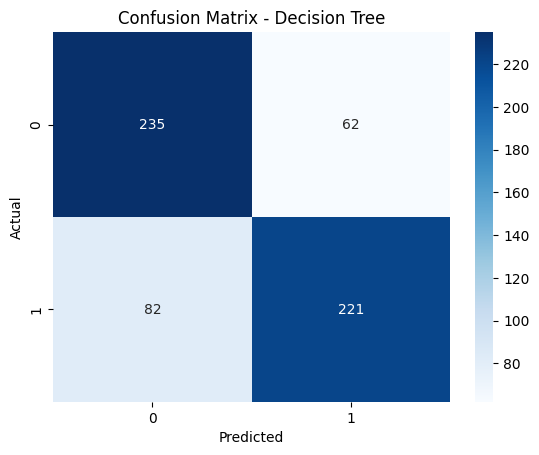

In [16]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Random Forest Classifier:
Accuracy: 0.8416666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       297
           1       0.88      0.80      0.84       303

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600

Confusion Matrix:
 [[263  34]
 [ 61 242]]


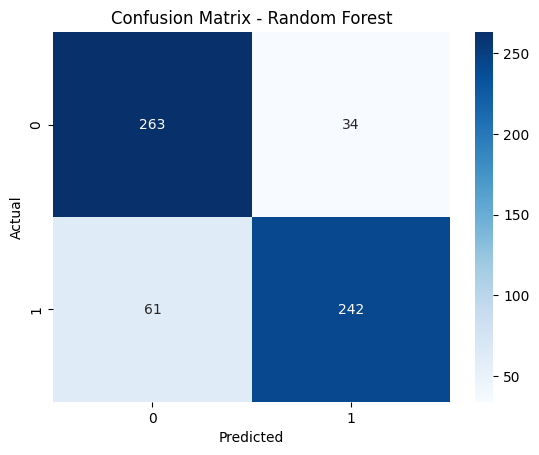

In [17]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Logistic Regression Classifier:
Accuracy: 0.5433333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.60      0.57       297
           1       0.55      0.49      0.52       303

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600

Confusion Matrix:
 [[179 118]
 [156 147]]


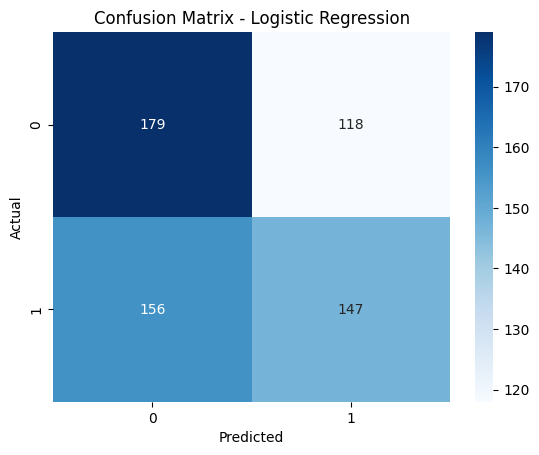

In [18]:
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier:
Accuracy: 0.5966666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.62      0.60       297
           1       0.61      0.57      0.59       303

    accuracy                           0.60       600
   macro avg       0.60      0.60      0.60       600
weighted avg       0.60      0.60      0.60       600

Confusion Matrix:
 [[184 113]
 [129 174]]


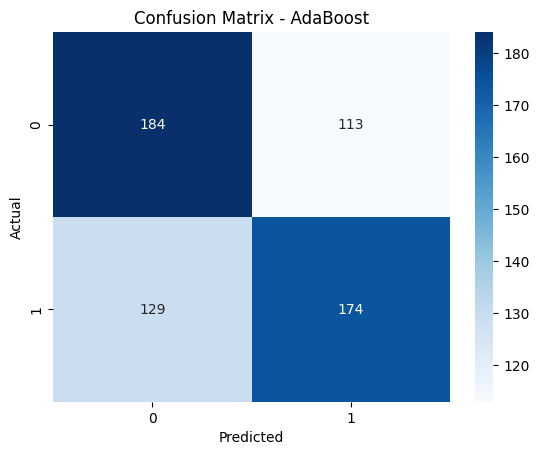

In [19]:
# Train AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluation
print("AdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

Linear Discriminant Analysis (LDA) Classifier:
Accuracy: 0.5433333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.60      0.57       297
           1       0.55      0.49      0.52       303

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600

Confusion Matrix:
 [[179 118]
 [156 147]]


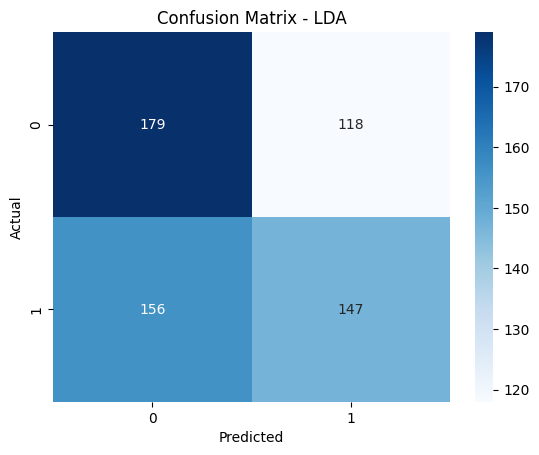

In [20]:
# Train LDA model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predictions
y_pred_lda = lda_model.predict(X_test)

# Evaluation
print("Linear Discriminant Analysis (LDA) Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Classification Report:\n", classification_report(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred_lda), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LDA')
plt.show()

K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.8016666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       297
           1       0.83      0.76      0.80       303

    accuracy                           0.80       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.80      0.80      0.80       600

Confusion Matrix:
 [[250  47]
 [ 72 231]]


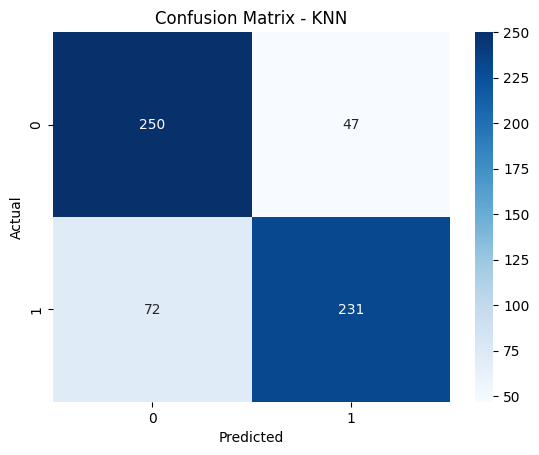

In [21]:
# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("K-Nearest Neighbors (KNN) Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

C:\Users\0860\AppData\Local\Temp\ipykernel_15792\2281522612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


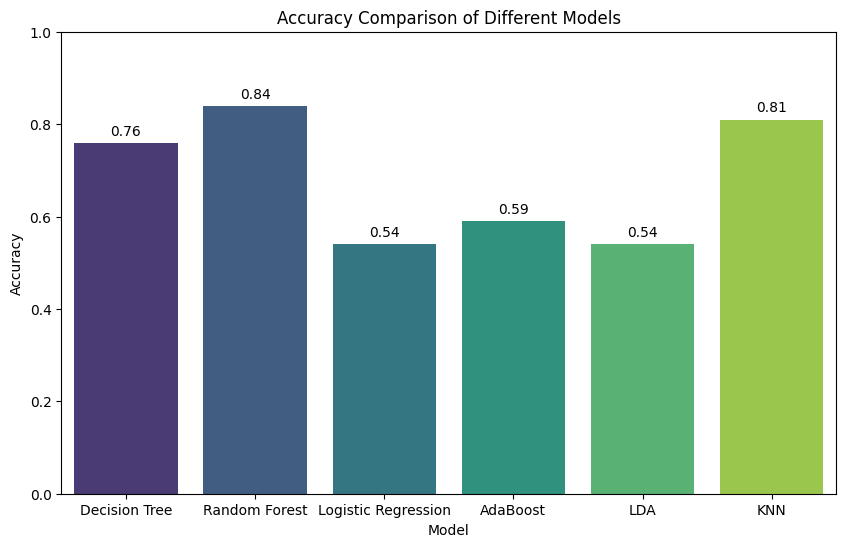

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Provided accuracies
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'AdaBoost', 'LDA', 'KNN']
accuracies = [0.76, 0.84, 0.54, 0.59, 0.54, 0.81]

# Plot the accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Accuracy Comparison of Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, round(accuracies[i], 4), ha='center', va='bottom')
plt.show()


In [24]:
df.head(10)

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,2274.848610,23.505867,29.243881,4.246782,86.417309,76.884161,0
1,2090.707432,23.411805,19.425377,4.583513,87.661897,89.795122,0
2,1530.197432,26.016272,22.463742,5.418869,70.976527,66.523439,0
3,847.098861,27.631603,27.250730,3.378207,72.328231,81.479725,0
4,717.010812,28.395960,20.506552,4.079368,91.100228,81.696079,0
5,1697.629820,32.510209,17.576350,3.796022,74.006958,63.821567,0
6,1132.217815,25.936059,27.565768,3.725330,77.711083,68.897632,1
7,2110.910915,25.022851,30.703762,5.954891,74.724964,70.860128,0
8,1257.952017,26.504319,20.108705,3.744656,88.029799,73.383012,1
9,1071.144347,24.992846,31.145184,3.046777,75.067440,84.252108,1


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Assuming X_train and y_train are your training data
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier()

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Save the models in .joblib format
joblib.dump(rf_model, 'rf_model.joblib')
joblib.dump(dt_model, 'dt_model.joblib')
joblib.dump(knn_model, 'knn_model.joblib')


['knn_model.joblib']

In [12]:
X_train

array([[ 1.71709233, -0.03562975,  0.7089426 ,  3.11955572,  0.1091834 ,
         3.20801244],
       [-0.04417881,  0.42566259, -0.15964309, -0.96933863, -0.71305823,
        -0.84605903],
       [ 0.03409625, -0.39149111, -1.06614067, -0.51526571,  0.78622616,
        -0.22207448],
       ...,
       [-0.65021976,  0.50210569, -0.31736137, -1.26547909, -0.20345457,
        -0.06861929],
       [-0.08392503,  1.2829203 , -1.08365984, -0.81222922,  0.85069401,
        -1.0599468 ],
       [-0.69090272, -1.38981779, -0.33205564, -0.05984349, -0.03744896,
        -1.23210544]])

In [13]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']